## Problem Set 02
### AST 8110, Fall 2022
##### Tyler Barna

In [1]:
import time
bigstart = time.time()

## Importing packages (some of these may not be useful)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
#import numba

import sys
import os
import astropy
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import random

from tqdm import tqdm
from scipy.stats import binned_statistic as binstat
from scipy import integrate

## Set Seed
random.seed(8110)


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


### Problem 1

The given Equations for the angular diameter distances are

$$
\begin{equation}
D_A(z) = \frac{c}{H_0} \frac{1}{(1+z)}\int_0^z \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

for the distance between the observer and the source ($D_{os}$) (here, $z_o=0$ and $z_s=z$), and

$$
\begin{equation}
D_A(z_l,z_s) = \frac{c}{H_0} \frac{1}{(1+z_s)}\int_{z_l}^{z_s} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

for the disance between the lens and the source ($D_{ls}$). The angular diameter distance between the observer and the lens ($D_{ol}$) can be found by substituting the the lens redshift for the observer redshift and the source redshift for the lens redshift in the latter equation, resulting in the expression

$$
\begin{equation}
D_A(z_o,z_l) = \frac{c}{H_0} \frac{1}{(1+z_l)}\int_{z_o}^{z_l} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

From lecture, the critical surface mass density is given by

$$
\begin{equation}
\Sigma_{crit} = \frac{c^2}{4\pi G} \frac{D_{os}}{ D_{ol} D_{sl}}
\end{equation}
$$

where $D_{os}$ is the angular diameter distance from the observer to the source, $D_{ol}$ is the angular diameter distance from the observer to the lens, and $D_{sl}$ is the angular diameter distance from the source to the lens. 


So, plugging in the other expressions, 

$$
\begin{equation}
\Sigma_{crit} = \frac{c^2}{4\pi G} \left( \frac{c}{H_0} \frac{1}{(1+z_s)}\int_0^{z_s} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}} \right)
\left[ 
\left(\frac{c}{H_0} \frac{1}{(1+z_s)}\int_{z_l}^{z_s} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}\right) 
\left( \frac{c}{H_0} \frac{1}{(1+z_l)}\int_{z_o}^{z_l} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}} \right)
\right]^{-1}
\end{equation}
$$

Simplifyinf this in to make a still somewhat messy expression,
$$
\begin{equation}
\Sigma_{crit} = 
\left( \int_0^z \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}} \right)
\left[ 
\left(\int_{z_l}^{z_s} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}\right) 
\left(\frac{1}{(1+z_l)}\int_{0}^{z_l} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}} \right)
\right]^{-1}
\left[\left(\frac{c^2}{4\pi G} \right) /\left(\frac{c}{H_0} \right)\right]
\end{equation}
$$

But that won't come up until part b

#### (a)

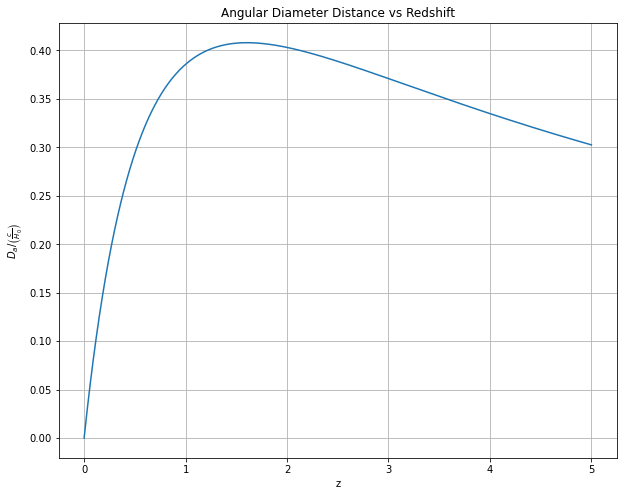

In [13]:
## define lambda function for angular distance with omega_m = 0.3 and omega_l = 0.7 in units of c/H_0
d_os = lambda z: 1/(1+z) * integrate.quad(lambda x: 1/np.sqrt(0.3*(1+x)**3 + 0.7), 0, z)[0]
d_os = np.vectorize(d_os) ## allows input of array

z_s = 5
num_points = 1000
a_range = np.linspace(0, z_s, num_points)

## plot curve
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(a_range, d_os(a_range));
plt.xlabel('z');
plt.ylabel(r'$D_a  / \left(\frac{c}{H_0}\right)$');
plt.title('Angular Diameter Distance vs Redshift');
plt.grid();
plt.show();

#### (b)